In [11]:
import sys
sys.path.insert(0, '../python')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy
from detector import detector
from parseData import parseChar2013
from arrayOp import stack2image
from imgOp import image_load, image2edge, image_norm, imShow, image2bb, image_save, image_norm
from fileOp import codebook_load, data_load, pickle_load
from featExt import maximalResize, conv2d
from scipy.misc import imresize
import pickle
import os

from skimage.measure import label as sklabel
from scipy.ndimage import label as splabel
from skimage.color import label2rgb
from scipy.ndimage.morphology import binary_dilation 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
# initialize fine detector 
rpower = 0.95 ** numpy.asarray(range(20))
codeBookName = 'codeBook.npy'
codebook = codebook_load(codeBookName)
classifierName = 'Classifier_rect.pkl'
clf = pickle_load(classifierName, '.')
parseGTName = 'parsedGT'
cdirname = '../data/ex1/'
dataList = pickle_load(parseGTName, cdirname)
labelMode = 'foreground'
featureMode = 'local'
edgeMode = True
mydetector = detector(codebook, dataList, 8, 1, 3, rpower, 0.8, 0.3, 'foreground', 'local', True)

In [101]:
def elasticDet(raw, mydetector):
    ef = numpy.arange(0.6, 1.6, 0.2) # elastic factor
    m0, n0 = raw.shape
    pred_stack = []

    for i in ef:
        if i <= 1:
            m = int(m0*i) 
            n = n0
        else:
            n = int(n0/i)
            m = m0
        img = imresize(raw, (m, n), interp = 'nearest')
        res_stack = mydetector.multiscale_test(img, clf)
        predim = stack2image(res_stack[0])
        predim = imresize(predim, (m0, n0), interp = 'nearest')
        pred_stack.append(predim)
    totalim = stack2image(pred_stack)
    return totalim

def regionGrow(raw, hmap):
    alpha = 1
    beta = 64
    prethre = 0.2
    #fpthre = 0.6
    cthre = 255
    ethre = 128


    edgeim = image2edge(raw)
    seedim = (hmap - alpha * edgeim) > beta
    ccim, label = splabel(seedim)
    finalim = numpy.zeros(raw.shape)
    for i in range(label):
        if i == 0:
            continue
        cim = numpy.uint8(ccim == i)
        baseColor = numpy.mean(raw[cim])
        cdiffim = abs(raw - baseColor)
        while 1:
            newcim = binary_dilation(cim)
            i_difim = newcim - cim
            i_colorim = numpy.multiply(cdiffim, i_difim)
            i_edgeim = numpy.multiply(edgeim, i_difim)
            i_color_map = i_colorim < cthre
            i_edge_map = i_edgeim < ethre

            r_difim = numpy.multiply(numpy.multiply(i_difim, i_color_map), i_edge_map) 
            cim = cim + r_difim
            pre = float(numpy.multiply(cim, seedim).sum())/ cim.sum()
            #fp =  float(numpy.multiply(cim, ~seedim).sum())/ numpy.uint8(~seedim).sum()
            #print pre, fp
            if pre < prethre:
                saveFlag = 0
                break
            if r_difim.sum() == 0:
                saveFlag = 1
                break
        if saveFlag:
            #imShow(cim.transpose())
            finalim = finalim + cim
    finalim[finalim>4]=0
    finalim = numpy.uint8(finalim > 0)
    return finalim

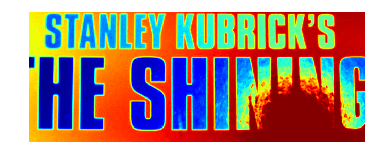

Exception in thread Thread-1261:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-1261:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

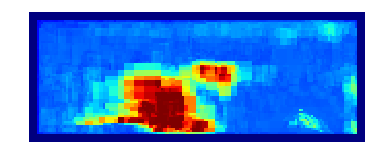

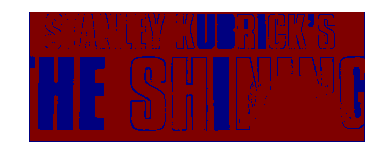

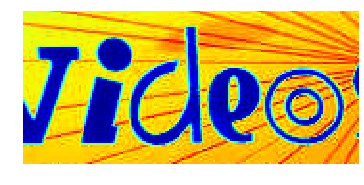

Exception in thread Thread-1540:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-1540:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

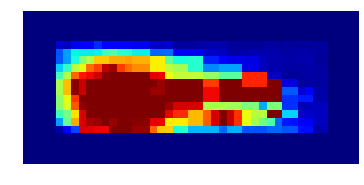

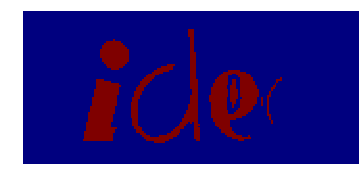

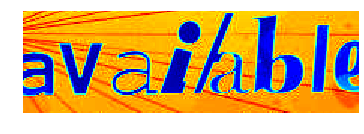

Exception in thread Thread-1888:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-1921:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

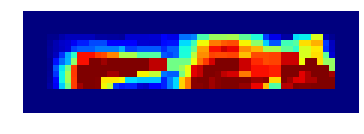

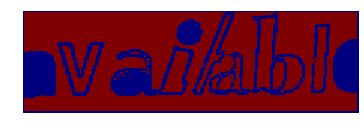

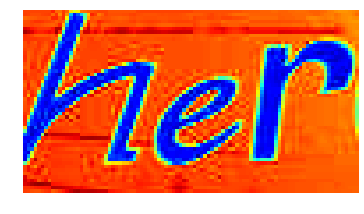

Exception in thread Thread-2116:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-2143:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

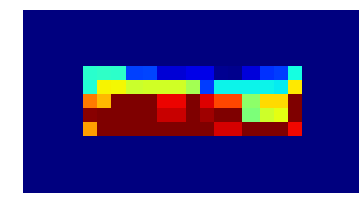

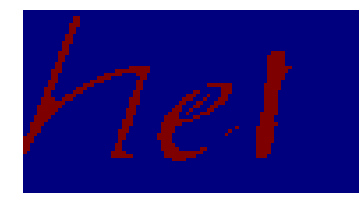

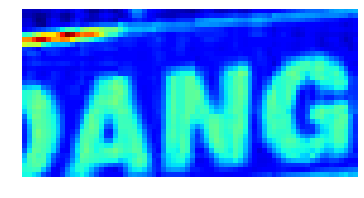

Exception in thread Thread-2407:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-2416:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

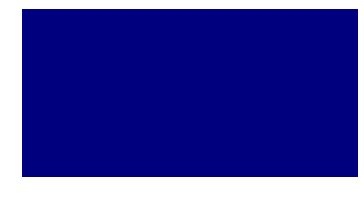

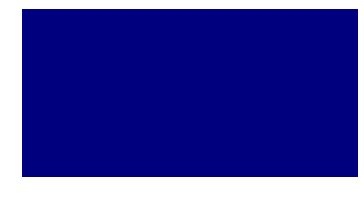

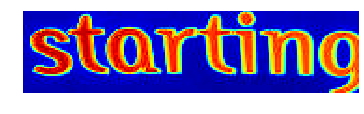

Exception in thread Thread-2716:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-2716:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

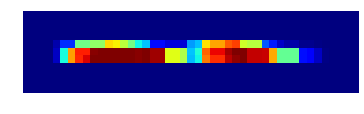

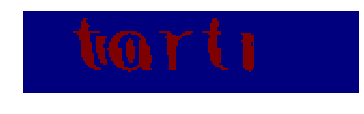

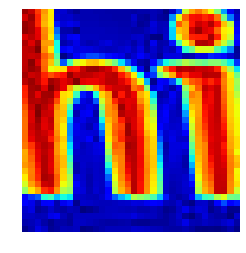

Exception in thread Thread-3028:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-3034:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (

KeyboardInterrupt: 

In [105]:
# load roi data
roidir = '../data/ex3/roi/'
dirlist = os.listdir(roidir)

for filename in dirlist:
    #filename = 'img_101'
    roi = pickle_load(filename, roidir)
    for r in roi:
        rsmall = imresize(r, 0.25, 'bilinear') # resize for faster computation
        hmap = elasticDet(rsmall, mydetector) # detect hotmap
        hmap = imresize(hmap, r.shape, interp = 'nearest') # resize hotmap to original size
        detmap = regionGrow(r, hmap) # find cc using hotmap
        
        imShow(r.transpose()) # show orginal image
        imShow(hmap.transpose()) # show hotmap
        imShow(detmap.transpose()) # show cc map
        raw_input()

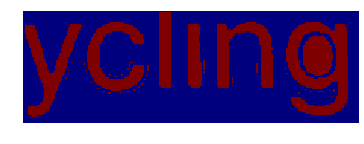

In [103]:
r = roi[0]
hmap = imresize(hmap, r.shape, interp = 'nearest')
detmap = regionGrow(r, hmap)
imShow(detmap.transpose())

In [107]:
clf

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=1, loss='ls',
             max_depth=1, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2, n_estimators=1000,
             random_state=0, subsample=1.0, verbose=0, warm_start=False)